# Feature Interactions

In [ ]:
# Late night programming at it's worst.  
# I think I have largely corrected my mistakes.

In [ ]:
# Method 1:  ICE Plots (https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html)
# https://scikit-learn.org/stable/modules/partial_dependence.html
# https://towardsdatascience.com/the-ultimate-guide-to-pdps-and-ice-plots-4182885662aa

In [1]:
import pandas as pd

In [ ]:
# df = pd.read_csv('../data/myopia.csv')
# df.head()

In [35]:
df = pd.read_csv('full_filtered_df.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1,0
1,6,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0
2,6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1,0
3,6,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0,0
4,6,1.033,23.330000,3.730,3.322,16.280001,4,5,1,1,3,23,0,0,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.loc[:,"MYOPIC"], test_size=0.1, random_state=0)

<IPython.core.display.Javascript object>

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
clf.fit(X_train, y_train)
print(f"Test R2 score: {clf.score(X_test, y_test):.2f}")

Test R2 score: 0.85


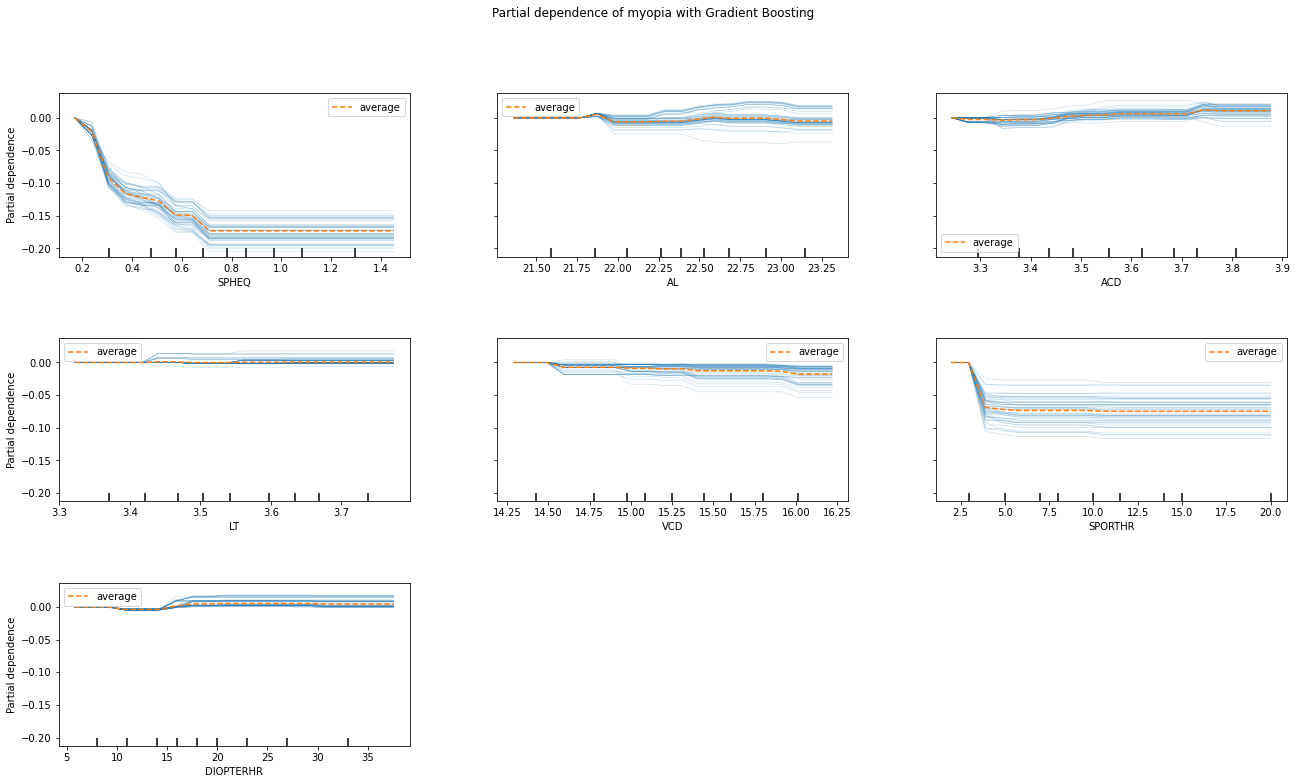

In [24]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 0,
}
fig, ax = plt.subplots(figsize=(22,12))
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train,
    features=['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'DIOPTERHR'],
    kind="both",
    ax=ax,
    **common_params,
)

display.figure_.suptitle(
    "Partial dependence of myopia with Random Forests"
)
display.figure_.subplots_adjust(wspace=.25, hspace=0.5)

In [ ]:
# Except for AL, all the other features show largely consistent trends for all scenarios
# Most trends show no relationship except SPHEQ and this is also the only variable that had a signifant influence on the target
# SPORTHR has an interesting response since it drops so much and SPORTHR has a broad range of values.